___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data*
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pyforest
import plotly
import cufflinks as cf

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV

from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve

# Libraries for Style
from colorama import Fore
from colorama import Style

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (8,5)

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 100)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_male = pd.read_csv("ANSUR II FEMALE Public.csv", encoding='latin-1')
df_male.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [3]:
df_female = pd.read_csv("ANSUR II MALE Public.csv", encoding='latin-1')
df_female.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [4]:
df_male.shape, df_female.shape

((1986, 108), (4082, 108))

In [5]:
df_male.columns = df_male.columns.str.strip().str.title()
df_female.columns = df_female.columns.str.strip().str.title()

In [6]:
index_list = []
for x in range(108):
    if df_male.columns[x] != df_female.columns[x]:
        index_list.append(x)
        
print(index_list)

[]


In [7]:
soldiers = pd.concat([df_male, df_female], axis=0, ignore_index=True)
df = soldiers.copy()

## Explore Data

In [8]:
df

,Subjectid,Abdominalextensiondepthsitting,Acromialheight,Acromionradialelength,Anklecircumference,Axillaheight,Balloffootcircumference,Balloffootlength,Biacromialbreadth,Bicepscircumferenceflexed,Bicristalbreadth,Bideltoidbreadth,Bimalleolarbreadth,Bitragionchinarc,Bitragionsubmandibulararc,Bizygomaticbreadth,Buttockcircumference,Buttockdepth,Buttockheight,Buttockkneelength,Buttockpopliteallength,Calfcircumference,Cervicaleheight,Chestbreadth,Chestcircumference,Chestdepth,Chestheight,Crotchheight,Crotchlengthomphalion,Crotchlengthposterioromphalion,Earbreadth,Earlength,Earprotrusion,Elbowrestheight,Eyeheightsitting,Footbreadthhorizontal,Footlength,Forearmcenterofgriplength,Forearmcircumferenceflexed,Forearmforearmbreadth,Forearmhandlength,Functionalleglength,Handbreadth,Handcircumference,Handlength,Headbreadth,Headcircumference,Headlength,Heelanklecircumference,Heelbreadth,Hipbreadth,Hipbreadthsitting,Iliocristaleheight,Interpupillarybreadth,Interscyei,Interscyeii,Kneeheightmidpatella,Kneeheightsitting,Lateralfemoralepicondyleheight,Lateralmalleolusheight,Lowerthighcircumference,Mentonsellionlength,Neckcircumference,Neckcircumferencebase,Overheadfingertipreachsitting,Palmlength,Poplitealheight,Radialestylionlength,Shouldercircumference,Shoulderelbowlength,Shoulderlength,Sittingheight,Sleevelengthspinewrist,Sleeveoutseam,Span,Stature,Suprasternaleheight,Tenthribheight,Thighcircumference,Thighclearance,Thumbtipreach,Tibialheight,Tragiontopofhead,Trochanterionheight,Verticaltrunkcircumferenceusa,Waistbacklength,Waistbreadth,Waistcircumference,Waistdepth,Waistfrontlengthsitting,Waistheightomphalion,Weightkg,Wristcircumference,Wristheight,Gender,Date,Installation,Component,Branch,Primarymos,Subjectsbirthlocation,Subjectnumericrace,Ethnicity,Dodrace,Age,Heightin,Weightlbs,Writingpreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [9]:
df.shape

(6068, 108)

In [10]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    Subjectid                       int64 
 1    Abdominalextensiondepthsitting  int64 
 2    Acromialheight                  int64 
 3    Acromionradialelength           int64 
 4    Anklecircumference              int64 
 5    Axillaheight                    int64 
 6    Balloffootcircumference         int64 
 7    Balloffootlength                int64 
 8    Biacromialbreadth               int64 
 9    Bicepscircumferenceflexed       int64 
 10   Bicristalbreadth                int64 
 11   Bideltoidbreadth                int64 
 12   Bimalleolarbreadth              int64 
 13   Bitragionchinarc                int64 
 14   Bitragionsubmandibulararc       int64 
 15   Bizygomaticbreadth              int64 
 16   Buttockcircumference            int64 
 17   Buttockdepth                   

In [11]:
df.dtypes.value_counts()

int64     99
object     9
dtype: int64

In [12]:
df.isnull().sum().sum()

4647

In [13]:
for col in df.columns:
    if df[col].isnull().sum() != 0: print(col)

Ethnicity


In [14]:
df.duplicated().sum()

0

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Subjectid,6068.0,20757.198418,13159.390894,10027.0,14841.75,20063.5,27234.50,920103.0
Abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
Acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
Acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
Anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
Axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
Balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
Balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
Biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
Bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0


***

### target column

***dodrace***

In [16]:
df.Dodrace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: Dodrace, dtype: int64

In [17]:
df.Dodrace.value_counts().iplot(kind='barh')

In [18]:
# Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)
df = df[df.Dodrace < 4].reset_index(drop=True)

In [19]:
df.shape

(5769, 108)

In [20]:
df['Dodrace'].replace([1,2,3], ['White', 'Black', 'Hispanic'], inplace=True)

In [21]:
df.Dodrace.value_counts()

White       3792
Black       1298
Hispanic     679
Name: Dodrace, dtype: int64

### object type columns

In [22]:
df.select_dtypes('object').columns

Index(['Gender', 'Date', 'Installation', 'Component', 'Branch', 'Primarymos',
       'Subjectsbirthlocation', 'Ethnicity', 'Dodrace', 'Writingpreference'],
      dtype='object')

In [23]:
df.select_dtypes('object').nunique()

Gender                     2
Date                     253
Installation              12
Component                  3
Branch                     3
Primarymos               281
Subjectsbirthlocation    136
Ethnicity                157
Dodrace                    3
Writingpreference          3
dtype: int64

***Ethnicity***

In [24]:
df.Ethnicity.value_counts(dropna=False).head(10)

NaN                       4644
Mexican                    356
Puerto Rican               183
Caribbean Islander         123
Cherokee                    60
Dominican                   32
Cuban                       17
Colombian                   17
Arab or Middle Eastern      16
Salvadoran                  16
Name: Ethnicity, dtype: int64

In [25]:
4644 / 5769  # percentage of NaN values

0.8049921996879875

In [26]:
del df['Ethnicity']

***Gender***

In [27]:
df.Gender.value_counts()

Male      3899
Female    1870
Name: Gender, dtype: int64

In [28]:
df.groupby(df.Gender).Dodrace.value_counts()

Gender  Dodrace 
Female  White        975
        Black        656
        Hispanic     239
Male    White       2817
        Black        642
        Hispanic     440
Name: Dodrace, dtype: int64

***Date***

In [29]:
# Date – Date the participant was measured
df.Date.value_counts().head()

5-Apr-12     43
5-Mar-12     43
28-Feb-12    42
26-May-11    40
6-Mar-12     40
Name: Date, dtype: int64

In [30]:
del df['Date']

***Installation***

In [31]:
# Installation – U.S. Army installation where the measurement occurred
df.Installation.value_counts()

Camp Shelby       1111
Fort Bliss         925
Fort Gordon        636
Camp Atterbury     432
Fort McCoy         432
Fort Hood          416
Fort Huachuca      404
Fort Bragg         373
Fort Drum          369
Fort Lee           356
Fort Stewart       314
Fort Rucker          1
Name: Installation, dtype: int64

In [32]:
del df['Installation']

***Component***

In [33]:
df.Component.value_counts()

Regular Army           2955
Army National Guard    2607
Army Reserve            207
Name: Component, dtype: int64

In [34]:
df.groupby(df.Component).Dodrace.value_counts()

Component            Dodrace 
Army National Guard  White       1855
                     Black        499
                     Hispanic     253
Army Reserve         White        114
                     Black         52
                     Hispanic      41
Regular Army         White       1823
                     Black        747
                     Hispanic     385
Name: Dodrace, dtype: int64

In [35]:
del df['Component']

***Branch***

In [36]:
df.Branch.value_counts()

Combat Service Support    3021
Combat Arms               1508
Combat Support            1240
Name: Branch, dtype: int64

In [37]:
df.groupby(df.Branch).Dodrace.value_counts()

Branch                  Dodrace 
Combat Arms             White       1146
                        Hispanic     189
                        Black        173
Combat Service Support  White       1911
                        Black        745
                        Hispanic     365
Combat Support          White        735
                        Black        380
                        Hispanic     125
Name: Dodrace, dtype: int64

In [38]:
del df['Branch']

***Primarymos***               

In [39]:
df.Primarymos.value_counts().head(10)

11B    641
88M    308
92A    275
91B    224
68W    207
92Y    200
25U    193
42A    189
31B    187
25B    169
Name: Primarymos, dtype: int64

In [40]:
df[df.Primarymos=='11B'].groupby('Dodrace').size()

Dodrace
Black        65
Hispanic     76
White       500
dtype: int64

In [41]:
df[df.Primarymos=='88M'].groupby('Dodrace').size()

Dodrace
Black        79
Hispanic     32
White       197
dtype: int64

In [42]:
del df['Primarymos']

***Subjectsbirthlocation***

In [43]:
df.Subjectsbirthlocation.value_counts().head(10)

California     417
New York       411
Texas          386
Indiana        264
Illinois       210
Florida        210
Oklahoma       205
Michigan       194
Minnesota      194
Mississippi    193
Name: Subjectsbirthlocation, dtype: int64

In [44]:
df[df.Subjectsbirthlocation == 'California']['Dodrace'].value_counts()

White       246
Hispanic    125
Black        46
Name: Dodrace, dtype: int64

In [45]:
df[df.Subjectsbirthlocation == 'Ohio']['Dodrace'].value_counts()

White    121
Black     18
Name: Dodrace, dtype: int64

In [46]:
df[df.Subjectsbirthlocation == 'Puerto Rico']['Dodrace'].value_counts()

Hispanic    84
White        4
Name: Dodrace, dtype: int64

***Writingpreference***

In [47]:
df.Writingpreference.value_counts()

Right hand                     5088
Left hand                       622
Either hand (No preference)      59
Name: Writingpreference, dtype: int64

In [48]:
df.groupby(df.Writingpreference).Dodrace.value_counts()

Writingpreference            Dodrace 
Either hand (No preference)  White         43
                             Black         13
                             Hispanic       3
Left hand                    White        422
                             Black        150
                             Hispanic      50
Right hand                   White       3327
                             Black       1135
                             Hispanic     626
Name: Dodrace, dtype: int64

In [ ]:
# del df['Writingpreference']

***

### numeric columns

In [49]:
df.dtypes.value_counts()

int64     98
object     4
dtype: int64

In [50]:
df.select_dtypes(include=['int64']).columns

Index(['Subjectid', 'Abdominalextensiondepthsitting', 'Acromialheight', 'Acromionradialelength',
       'Anklecircumference', 'Axillaheight', 'Balloffootcircumference', 'Balloffootlength',
       'Biacromialbreadth', 'Bicepscircumferenceflexed', 'Bicristalbreadth', 'Bideltoidbreadth',
       'Bimalleolarbreadth', 'Bitragionchinarc', 'Bitragionsubmandibulararc', 'Bizygomaticbreadth',
       'Buttockcircumference', 'Buttockdepth', 'Buttockheight', 'Buttockkneelength',
       'Buttockpopliteallength', 'Calfcircumference', 'Cervicaleheight', 'Chestbreadth',
       'Chestcircumference', 'Chestdepth', 'Chestheight', 'Crotchheight', 'Crotchlengthomphalion',
       'Crotchlengthposterioromphalion', 'Earbreadth', 'Earlength', 'Earprotrusion',
       'Elbowrestheight', 'Eyeheightsitting', 'Footbreadthhorizontal', 'Footlength',
       'Forearmcenterofgriplength', 'Forearmcircumferenceflexed', 'Forearmforearmbreadth',
       'Forearmhandlength', 'Functionalleglength', 'Handbreadth', 'Handcircumfer

In [51]:
# subjectid – A unique number for each participant measured in the anthropometric survey
del df['Subjectid']

In [52]:
# Weightlbs – Weight in Pounds; self-reported, comparable to measured “weightkg”
del df['Weightlbs']

In [53]:
# Heightin – Height in Inches; self-reported, comparable to measured “stature”
del df['Heightin']

In [54]:
# SubjectNumericRace – Subject Numeric Race; a single or multi-digit code indicating a subject’s self-reported race or races 
# (verified through interview)

df.Subjectnumericrace.value_counts().head(10)

1      3559
2      1025
3       541
31      159
8       106
51      102
21       60
23       34
28       26
251      20
Name: Subjectnumericrace, dtype: int64

In [55]:
del df['Subjectnumericrace']

In [56]:
for col in df.select_dtypes(include=['int64']).columns:
    if any(df[col].values==0): print(col)
        
# there are no columns with a value of 0 in it

In [57]:
# OUTLIERS

iqr_factor = [2, 3]
liste1, liste2 = [], []

for factor in iqr_factor:
    count = 0
    print(f'{Fore.RED}Outliers for {factor} IQR :{Style.RESET_ALL}')
    print('-------------------------------------')
    for col in df.select_dtypes(include=['int64']).columns:
    
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_lim = df[col].quantile(0.25) - factor*IQR
        upper_lim = df[col].quantile(0.75) + factor*IQR
    
        cond = df[(df[col] < lower_lim) | (df[col] > upper_lim)].shape[0]
        
        if cond > 0 and factor == 2:
            liste1.append(df[(df[col] < lower_lim) | (df[col] > upper_lim)].index.tolist())
        if cond > 0 and factor == 3:
            liste2.append(df[(df[col] < lower_lim) | (df[col] > upper_lim)].index.tolist())
        
        if cond > 0: print(f'{col:<30} : ', cond); count += cond
    print(f'\n{Fore.BLUE}TOTAL OUTLIERS FOR {factor} IQR : {count}{Style.RESET_ALL}')
    print('')

Outliers for 2 IQR :
-------------------------------------
Abdominalextensiondepthsitting :  11
Acromionradialelength          :  2
Anklecircumference             :  10
Axillaheight                   :  1
Balloffootcircumference        :  4
Balloffootlength               :  1
Biacromialbreadth              :  1
Bicepscircumferenceflexed      :  1
Bicristalbreadth               :  8
Bitragionchinarc               :  3
Bitragionsubmandibulararc      :  2
Buttockcircumference           :  14
Buttockdepth                   :  8
Buttockheight                  :  7
Buttockkneelength              :  3
Buttockpopliteallength         :  3
Calfcircumference              :  9
Chestbreadth                   :  3
Chestcircumference             :  1
Chestdepth                     :  2
Crotchheight                   :  4
Crotchlengthomphalion          :  10
Crotchlengthposterioromphalion :  4
Earbreadth                     :  8
Earlength                      :  2
Earprotrusion                  :  9
E

In [58]:
len(sum(liste1, [])), len(sum(liste2, []))

(373, 9)

In [ ]:
# I will keep outliers as most measurements are in millimeters and are real data 

# df = df.drop(index=sum(liste1, [])).reset_index(drop=True)  ===> DROPPING OUTLIERS WITH 2 IQR
# df = df.drop(index=sum(liste2, [])).reset_index(drop=True)  ===> DROPPING OUTLIERS WITH 3 IQR

In [59]:
# MULTICOLLINEARITY

df_temp = df.corr()
feature1, feature2, corrcoef = [], [], []

for ind in df_temp.index:
    for col in df_temp.columns:
        if (df_temp[ind][col] > 0.9 and df_temp[ind][col] < 1) or (df_temp[ind][col] < -0.9 and df_temp[ind][col] > -1):
            feature1.append(ind)
            feature2.append(col)
            corrcoef.append(df_temp[ind][col])
            
corr_dict = {'feature1': feature1, 'feature2': feature2, 'corrcoeff': corrcoef}
df_corr = pd.DataFrame(corr_dict)
df_corr

,feature1,feature2,corrcoeff
0,Abdominalextensiondepthsitting,Waistcircumference,0.939645
1,Abdominalextensiondepthsitting,Waistdepth,0.958716
2,Acromialheight,Axillaheight,0.987115
3,Acromialheight,Cervicaleheight,0.983955
4,Acromialheight,Chestheight,0.959300
5,Acromialheight,Iliocristaleheight,0.932232
6,Acromialheight,Kneeheightsitting,0.931762
7,Acromialheight,Stature,0.979925
8,Acromialheight,Suprasternaleheight,0.984711
9,Acromialheight,Tenthribheight,0.945019


***

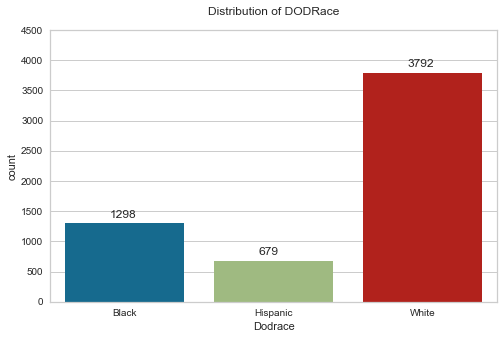

In [60]:
ax = sns.countplot(x='Dodrace', data=df)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+100), fontsize=12)

ax.set_title('Distribution of DODRace', pad=15)
ax.set_ylim(0, 4500);

In [61]:
df.shape

(5769, 98)

In [62]:
df.select_dtypes('object').columns

Index(['Gender', 'Subjectsbirthlocation', 'Dodrace', 'Writingpreference'], dtype='object')

In [ ]:
# df.to_csv('soldiers.csv', index=False)

In [63]:
# I will also create copies of the dataset by gender

df_m = df[df.Gender == 'Male'].reset_index(drop=True).drop(columns='Gender', axis=1)
df_f = df[df.Gender == 'Female'].reset_index(drop=True).drop(columns='Gender', axis=1)

df_m.to_csv('soldiers_male.csv', index=False)
df_f.to_csv('soldiers_female.csv', index=False)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [64]:
X = pd.get_dummies(df.drop('Dodrace', axis=1), drop_first=True)
y = df['Dodrace']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=30)

In [66]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 232)
Train target shape   :  (4615,)
Test features shape  :  (1154, 232)
Test target shape    :  (1154,)


In [67]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# Modeling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [68]:
from sklearn.pipeline import Pipeline
operations_log = [("scaler", MinMaxScaler()), ("log", LogisticRegression())]
pipe_log_model = Pipeline(steps=operations_log)

In [69]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[236   1  23]
 [  7  82  47]
 [ 12  12 734]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.86      0.60      0.71       136
       White       0.91      0.97      0.94       758

    accuracy                           0.91      1154
   macro avg       0.90      0.83      0.86      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set
[[ 954   15   69]
 [  31  307  205]
 [  24   51 2959]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.93      1038
    Hispanic       0.82      0.57      0.67       543
       White       0.92      0.98      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.89      0.82      0.85      4615
weighted avg       0.91      0.91      0.91      4615



In [70]:
# I know I have an unbalanced dataset so I will set class_weight to 'balanced'
# and try to increase the recall_macro (balanced_accuracy) score 
# and check out the 'Hispanic' scores together with specific iteration

operations_log = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced', max_iter=1000))]
pipe_log_model = Pipeline(steps=operations_log)

pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[245   4  11]
 [  4 111  21]
 [ 22  93 643]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92       260
    Hispanic       0.53      0.82      0.65       136
       White       0.95      0.85      0.90       758

    accuracy                           0.87      1154
   macro avg       0.80      0.87      0.82      1154
weighted avg       0.89      0.87      0.87      1154


Train_Set
[[ 969   41   28]
 [  23  452   68]
 [  61  360 2613]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.53      0.83      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In [72]:
y_pred = pipe_log_model.predict(X_test)
print(f'accuracy_score\t\t: {accuracy_score(y_test, y_pred)}')
print(f'balanced_accuracy_score : {balanced_accuracy_score(y_test, y_pred)}')  # recall_score(y_test, y_pred, average='macro')

accuracy_score		: 0.865684575389948
balanced_accuracy_score : 0.8689230411060304


In [73]:
# CROSS VALIDATE
# I will use 5-fold cross-validation as standard to make correct comparisons across all models

operations_log = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced', max_iter=1000))]
pipe_log_model = Pipeline(steps=operations_log)

scoring = {'accuracy': make_scorer(accuracy_score), 'accuracy_balanced': make_scorer(balanced_accuracy_score),
           'precision_Hispanic' : make_scorer(precision_score, average=None, labels=['Hispanic']),
           'recall_Hispanic' : make_scorer(recall_score, average=None, labels=['Hispanic']),
           'f1_Hispanic' : make_scorer(f1_score, average=None, labels=['Hispanic'])}
         
scores = cross_validate(pipe_log_model, X_train, y_train, scoring=scoring, cv=5)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_accuracy              0.855471
test_accuracy_balanced     0.847296
test_precision_Hispanic    0.492940
test_recall_Hispanic       0.780819
test_f1_Hispanic           0.603049
dtype: float64

### Logistic Model GridsearchCV

In [74]:
# for liblinear solver only
# For small datasets, ‘liblinear’ is a good choice for multiclass problems 

operations_log = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced', max_iter=1000,
                                                                             solver='liblinear'))]
pipe_log_model = Pipeline(steps=operations_log)

# with logistic regression, there is no overfitting problem so far, so I will mostly try values greater than the default (for C)
param_grid = {'log__penalty': ['l1', 'l2'], 'log__C': [0.1, 1, 5, 30, 50]}

log_grid_model1 = GridSearchCV(estimator = pipe_log_model,
                            param_grid = param_grid,
                            cv = 5,
                            scoring = 'recall_macro',
                            verbose = 2,
                            n_jobs = -1).fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [75]:
log_grid_model1.best_params_

{'log__C': 5, 'log__penalty': 'l2'}

In [76]:
log_grid_model1.best_score_

0.8354594036250826

In [77]:
eval_metric(log_grid_model1, X_train, y_train, X_test, y_test)

Test_Set
[[241   1  18]
 [  6  97  33]
 [ 19  41 698]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92       260
    Hispanic       0.70      0.71      0.71       136
       White       0.93      0.92      0.93       758

    accuracy                           0.90      1154
   macro avg       0.85      0.85      0.85      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 983   17   38]
 [  26  393  124]
 [  41  144 2849]]
              precision    recall  f1-score   support

       Black       0.94      0.95      0.94      1038
    Hispanic       0.71      0.72      0.72       543
       White       0.95      0.94      0.94      3034

    accuracy                           0.92      4615
   macro avg       0.86      0.87      0.87      4615
weighted avg       0.92      0.92      0.92      4615



In [78]:
y_pred = log_grid_model1.predict(X_test)
print(f'accuracy_score\t\t: {accuracy_score(y_test, y_pred)}')
print(f'balanced_accuracy_score : {balanced_accuracy_score(y_test, y_pred)}')  # recall_score(y_test, y_pred, average='macro')

accuracy_score		: 0.8977469670710572
balanced_accuracy_score : 0.8536675660725016


In [79]:
# I tried the scores only for 'liblinear' solver and could not get better scores for balanced_accuracy
# I want especially try the 'elasticnet' solver because of balanced scores between train and test data

operations_log = [("scaler", MinMaxScaler()),("log", LogisticRegression(class_weight='balanced',max_iter=1000,random_state=30))]
pipe_log_model = Pipeline(steps=operations_log)

# 'sag' or 'saga' might be the best solver, so I used random_state instance above

param_grid = [
  {'log__solver': ['sag', 'newton-cg', 'lbfgs'], 'log__penalty': ['l2'], 'log__C': [0.1, 1, 5, 10]},
  {'log__solver': ['saga'], 'log__penalty': ['elasticnet'], 'log__l1_ratio':[0.1, 0.2, 0.5, 0.8, 1], 'log__C': [0.1, 1, 5, 10]}
 ]

log_grid_model2 = GridSearchCV(estimator = pipe_log_model,
                          param_grid = param_grid,
                          cv = 5,
                          scoring = 'recall_macro',
                          verbose = 2,
                          n_jobs = -1).fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [80]:
log_grid_model2.best_params_

{'log__C': 5,
 'log__l1_ratio': 0.1,
 'log__penalty': 'elasticnet',
 'log__solver': 'saga'}

In [81]:
log_grid_model2.best_score_

0.8508543905700702

In [82]:
eval_metric(log_grid_model2, X_train, y_train, X_test, y_test)

Test_Set
[[245   4  11]
 [  5 111  20]
 [ 25  88 645]]
              precision    recall  f1-score   support

       Black       0.89      0.94      0.92       260
    Hispanic       0.55      0.82      0.65       136
       White       0.95      0.85      0.90       758

    accuracy                           0.87      1154
   macro avg       0.80      0.87      0.82      1154
weighted avg       0.89      0.87      0.87      1154


Train_Set
[[ 979   35   24]
 [  17  463   63]
 [  52  335 2647]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.94      1038
    Hispanic       0.56      0.85      0.67       543
       White       0.97      0.87      0.92      3034

    accuracy                           0.89      4615
   macro avg       0.82      0.89      0.84      4615
weighted avg       0.91      0.89      0.89      4615



In [83]:
y_pred = log_grid_model2.predict(X_test)
print(f'accuracy_score\t\t: {accuracy_score(y_test, y_pred)}')
print(f'balanced_accuracy_score : {balanced_accuracy_score(y_test, y_pred)}')  # recall_score(y_test, y_pred, average='macro')

accuracy_score		: 0.8674176776429809
balanced_accuracy_score : 0.8698025485818439


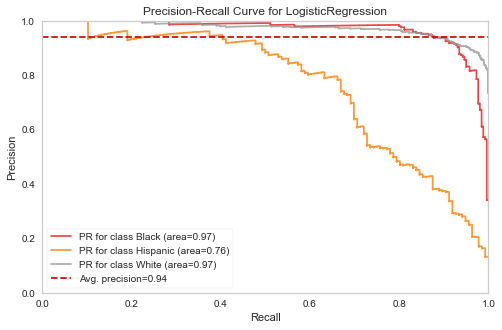

In [84]:
# Logistic regression vanilla model (with class_weight='balanced') and log_grid_model2 almost have the same scores
# I will prefer the log_grid_model2 because of the scores given by cross-validation (compared with grid search cv)

from yellowbrick.classifier import PrecisionRecallCurve

operations_log = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga',
                                                                l1_ratio=0.1, C=5, penalty='elasticnet', random_state=30))]
pipe_log_model = Pipeline(steps=operations_log)

viz = PrecisionRecallCurve(
        pipe_log_model,
        per_class=True, classes= ['Black', 'Hispanic', 'White'],
        cmap='Set1'
)

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [85]:
viz.score_

{'Black': 0.969273276015362,
 'Hispanic': 0.7642765417919569,
 'White': 0.973473770515348,
 'micro': 0.9402495348629517}

In [86]:
y_pred = log_grid_model2.predict(X_test)

log_accuracy = accuracy_score(y_test, y_pred)
log_accuracy_balanced = balanced_accuracy_score(y_test, y_pred)
log_f1 = f1_score(y_test, y_pred, average=None, labels=['Hispanic'])
log_recall = recall_score(y_test, y_pred, average=None, labels=['Hispanic'])
log_AP = viz.score_['Hispanic']
log_AP_micro = viz.score_['micro']

***

## 2. SVC (Support Vector Classifier)

### Vanilla SVC model 

In [87]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC())]
pipe_svc_model = Pipeline(steps=operations_svc)

In [88]:
pipe_svc_model.fit(X_train, y_train)
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[230   0  30]
 [  8  51  77]
 [  7   3 748]]
              precision    recall  f1-score   support

       Black       0.94      0.88      0.91       260
    Hispanic       0.94      0.38      0.54       136
       White       0.87      0.99      0.93       758

    accuracy                           0.89      1154
   macro avg       0.92      0.75      0.79      1154
weighted avg       0.90      0.89      0.88      1154


Train_Set
[[ 926    2  110]
 [  38  141  364]
 [  18    3 3013]]
              precision    recall  f1-score   support

       Black       0.94      0.89      0.92      1038
    Hispanic       0.97      0.26      0.41       543
       White       0.86      0.99      0.92      3034

    accuracy                           0.88      4615
   macro avg       0.92      0.71      0.75      4615
weighted avg       0.89      0.88      0.86      4615



In [89]:
# I got bad scores for 'Hispanic' on the vanilla model,
# so I will set class_weight to 'balanced' as I know I have an unbalanced dataset

operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight='balanced', random_state=30))]
pipe_svc_model = Pipeline(steps=operations_svc)

In [90]:
pipe_svc_model.fit(X_train, y_train)
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[235   7  18]
 [  6 104  26]
 [ 18 118 622]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       260
    Hispanic       0.45      0.76      0.57       136
       White       0.93      0.82      0.87       758

    accuracy                           0.83      1154
   macro avg       0.77      0.83      0.78      1154
weighted avg       0.87      0.83      0.85      1154


Train_Set
[[ 953   48   37]
 [  22  457   64]
 [  54  423 2557]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [91]:
y_pred = pipe_svc_model.predict(X_test)
print(f'accuracy_score\t\t: {accuracy_score(y_test, y_pred)}')
print(f'balanced_accuracy_score : {balanced_accuracy_score(y_test, y_pred)}')  # recall_score(y_test, y_pred, average='macro')

accuracy_score		: 0.8327556325823223
balanced_accuracy_score : 0.8297108370443773


In [92]:
# CROSS VALIDATE

operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight='balanced', random_state=30))]
pipe_svc_model = Pipeline(steps=operations_svc)

scoring = {'accuracy': make_scorer(accuracy_score), 'accuracy_balanced': make_scorer(balanced_accuracy_score),
           'precision_Hispanic' : make_scorer(precision_score, average=None, labels=['Hispanic']),
           'recall_Hispanic' : make_scorer(recall_score, average=None, labels=['Hispanic']),
           'f1_Hispanic' : make_scorer(f1_score, average=None, labels=['Hispanic'])}

scores = cross_validate(pipe_svc_model, X_train, y_train, scoring=scoring, cv=5)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_accuracy              0.837486
test_accuracy_balanced     0.834351
test_precision_Hispanic    0.450366
test_recall_Hispanic       0.775331
test_f1_Hispanic           0.569427
dtype: float64

###  SVC Model GridsearchCV

In [93]:
# GridSearch for 'poly' kernel

operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight='balanced', random_state=30))]
pipe_svc_model = Pipeline(steps=operations_svc)

param_grid = [
  {'svc__kernel':['poly'], 'svc__degree':[1, 2, 3], 'svc__C':[0.1, 1, 10], 'svc__gamma':['scale', 'auto', 1, 0.1, 0.01]}
 ]

# I also tried the C regularization parameter for values greater than 10 before ('10' is the optimum value)

svc_grid_model1 = GridSearchCV(estimator = pipe_svc_model,
                          param_grid = param_grid,
                          cv = 5,
                          verbose = 2,
                          scoring = 'recall_macro',
                          n_jobs = -1).fit(X_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


In [94]:
svc_grid_model1.best_params_

{'svc__C': 10, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'poly'}

In [95]:
svc_grid_model1.best_score_

0.8475886868973571

In [96]:
eval_metric(svc_grid_model1, X_train, y_train, X_test, y_test)

Test_Set
[[244   5  11]
 [  7 111  18]
 [ 26  89 643]]
              precision    recall  f1-score   support

       Black       0.88      0.94      0.91       260
    Hispanic       0.54      0.82      0.65       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.87      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 993   24   21]
 [  14  482   47]
 [  56  313 2665]]
              precision    recall  f1-score   support

       Black       0.93      0.96      0.95      1038
    Hispanic       0.59      0.89      0.71       543
       White       0.98      0.88      0.92      3034

    accuracy                           0.90      4615
   macro avg       0.83      0.91      0.86      4615
weighted avg       0.92      0.90      0.90      4615



In [97]:
y_pred = svc_grid_model1.predict(X_test)
print(f'accuracy_score\t\t: {accuracy_score(y_test, y_pred)}')
print(f'balanced_accuracy_score : {balanced_accuracy_score(y_test, y_pred)}')  # recall_score(y_test, y_pred, average='macro')

accuracy_score		: 0.8648180242634316
balanced_accuracy_score : 0.8676409898239791


In [98]:
# GridSearch with other kernels

operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight='balanced', random_state=30))]
pipe_svc_model = Pipeline(steps=operations_svc)

# I also tried the C regularization parameter for values less than '10' before
param_grid = [
  {'svc__kernel':['sigmoid', 'rbf'], 'svc__C':[1, 10, 100], 'svc__gamma':['scale', 'auto', 0.1, 0.01, 1]},
  {'svc__kernel':['linear', 'precomputed'], 'svc__C':[1, 10, 100]}
 ]

svc_grid_model2 = GridSearchCV(estimator = pipe_svc_model,
                          param_grid = param_grid,
                          cv = 5,
                          verbose = 2,
                          scoring = 'recall_macro',
                          n_jobs = -1).fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [99]:
svc_grid_model2.best_params_

{'svc__C': 100, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}

In [100]:
svc_grid_model2.best_score_

0.842470350409314

In [101]:
eval_metric(svc_grid_model2, X_train, y_train, X_test, y_test)

Test_Set
[[243   5  12]
 [  6 110  20]
 [ 23  89 646]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91       260
    Hispanic       0.54      0.81      0.65       136
       White       0.95      0.85      0.90       758

    accuracy                           0.87      1154
   macro avg       0.80      0.87      0.82      1154
weighted avg       0.89      0.87      0.87      1154


Train_Set
[[ 977   37   24]
 [  20  465   58]
 [  57  353 2624]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.54      0.86      0.67       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



In [102]:
y_pred = svc_grid_model2.predict(X_test)
print(f'accuracy_score\t\t: {accuracy_score(y_test, y_pred)}')
print(f'balanced_accuracy_score : {balanced_accuracy_score(y_test, y_pred)}')  # recall_score(y_test, y_pred, average='macro')

accuracy_score		: 0.865684575389948
balanced_accuracy_score : 0.8652272193634913


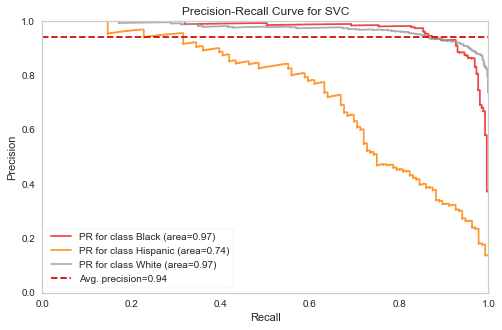

In [103]:
from yellowbrick.classifier import PrecisionRecallCurve

operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight='balanced', gamma='auto', C=100, random_state=30))]
pipe_svc_model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
        pipe_svc_model,
        per_class=True, classes= ['Black', 'Hispanic', 'White'],
        cmap='Set1'
)

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [104]:
viz.score_

{'Black': 0.9729958488956378,
 'Hispanic': 0.7420900330704385,
 'White': 0.9717003142967957,
 'micro': 0.9420612048755549}

In [105]:
y_pred = svc_grid_model2.predict(X_test)

svc_accuracy = accuracy_score(y_test, y_pred)
svc_accuracy_balanced = balanced_accuracy_score(y_test, y_pred)
svc_f1 = f1_score(y_test, y_pred, average=None, labels=['Hispanic'])
svc_recall = recall_score(y_test, y_pred, average=None, labels=['Hispanic'])
svc_AP = viz.score_['Hispanic']
svc_AP_micro = viz.score_['micro']

***

## 3. RF (RANDOM FOREST)

***DATA Preprocessing***

In [106]:
from sklearn.preprocessing import OrdinalEncoder

In [107]:
X2 = df.drop('Dodrace', axis=1)
y = df['Dodrace']

In [108]:
cat = X2.select_dtypes("object").columns
cat

Index(['Gender', 'Subjectsbirthlocation', 'Writingpreference'], dtype='object')

In [109]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.head()

,Abdominalextensiondepthsitting,Acromialheight,Acromionradialelength,Anklecircumference,Axillaheight,Balloffootcircumference,Balloffootlength,Biacromialbreadth,Bicepscircumferenceflexed,Bicristalbreadth,Bideltoidbreadth,Bimalleolarbreadth,Bitragionchinarc,Bitragionsubmandibulararc,Bizygomaticbreadth,Buttockcircumference,Buttockdepth,Buttockheight,Buttockkneelength,Buttockpopliteallength,Calfcircumference,Cervicaleheight,Chestbreadth,Chestcircumference,Chestdepth,Chestheight,Crotchheight,Crotchlengthomphalion,Crotchlengthposterioromphalion,Earbreadth,Earlength,Earprotrusion,Elbowrestheight,Eyeheightsitting,Footbreadthhorizontal,Footlength,Forearmcenterofgriplength,Forearmcircumferenceflexed,Forearmforearmbreadth,Forearmhandlength,Functionalleglength,Handbreadth,Handcircumference,Handlength,Headbreadth,Headcircumference,Headlength,Heelanklecircumference,Heelbreadth,Hipbreadth,Hipbreadthsitting,Iliocristaleheight,Interpupillarybreadth,Interscyei,Interscyeii,Kneeheightmidpatella,Kneeheightsitting,Lateralfemoralepicondyleheight,Lateralmalleolusheight,Lowerthighcircumference,Mentonsellionlength,Neckcircumference,Neckcircumferencebase,Overheadfingertipreachsitting,Palmlength,Poplitealheight,Radialestylionlength,Shouldercircumference,Shoulderelbowlength,Shoulderlength,Sittingheight,Sleevelengthspinewrist,Sleeveoutseam,Span,Stature,Suprasternaleheight,Tenthribheight,Thighcircumference,Thighclearance,Thumbtipreach,Tibialheight,Tragiontopofhead,Trochanterionheight,Verticaltrunkcircumferenceusa,Waistbacklength,Waistbreadth,Waistcircumference,Waistdepth,Waistfrontlengthsitting,Waistheightomphalion,Weightkg,Wristcircumference,Wristheight,Gender,Subjectsbirthlocation,Age,Writingpreference
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,0.0,41.0,26,2.0
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,0.0,18.0,21,2.0
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,0.0,119.0,23,2.0
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,0.0,30.0,22,2.0
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,0.0,119.0,45,2.0


In [110]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, stratify=y, random_state=30)

In [111]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


### Vanilla RF Model

In [112]:
rf_model = RandomForestClassifier().fit(X_train2, y_train2)
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[197   0  63]
 [ 17   8 111]
 [ 17   6 735]]
              precision    recall  f1-score   support

       Black       0.85      0.76      0.80       260
    Hispanic       0.57      0.06      0.11       136
       White       0.81      0.97      0.88       758

    accuracy                           0.81      1154
   macro avg       0.74      0.60      0.60      1154
weighted avg       0.79      0.81      0.77      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [113]:
# I know I have an unbalanced dataset so I will set class_weight to 'balanced'

rf_model = RandomForestClassifier(class_weight='balanced', random_state=30).fit(X_train2, y_train2)

eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[174   0  86]
 [ 11   3 122]
 [  6   1 751]]
              precision    recall  f1-score   support

       Black       0.91      0.67      0.77       260
    Hispanic       0.75      0.02      0.04       136
       White       0.78      0.99      0.87       758

    accuracy                           0.80      1154
   macro avg       0.81      0.56      0.56      1154
weighted avg       0.81      0.80      0.75      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [ ]:
# scores got worse, and there is a overfitting problem

In [114]:
# CROSS VALIDATE

model = RandomForestClassifier(class_weight='balanced', random_state=30)

scoring = {'accuracy': make_scorer(accuracy_score), 'accuracy_balanced': make_scorer(balanced_accuracy_score),
           'precision_Hispanic' : make_scorer(precision_score, average=None, labels=['Hispanic']),
           'recall_Hispanic' : make_scorer(recall_score, average=None, labels=['Hispanic']),
           'f1_Hispanic' : make_scorer(f1_score, average=None, labels=['Hispanic'])}

scores = cross_validate(model, X_train2, y_train2, scoring=scoring, cv=5)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_accuracy              0.809751
test_accuracy_balanced     0.575160
test_precision_Hispanic    0.712727
test_recall_Hispanic       0.044122
test_f1_Hispanic           0.082293
dtype: float64

### RF Model GridsearchCV

In [115]:
# Grid Search

# this is the second try after seeing the values in the limit
model = RandomForestClassifier(class_weight='balanced', random_state=30)

param_grid = {'n_estimators':[100, 128, 200], 'ccp_alpha':[0.001, 0.0001], 'max_features':[len(X2.columns)/3, 20, 40, 'auto'],
              'max_depth':[11, 17], 'min_samples_split':[20, 40]}

rf_grid_model = GridSearchCV(estimator = model,
                        param_grid = param_grid,
                        cv = 5,
                        verbose = 2,
                        scoring = 'recall_macro',
                        n_jobs = -1).fit(X_train2, y_train2)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [116]:
rf_grid_model.best_params_

{'ccp_alpha': 0.001,
 'max_depth': 11,
 'max_features': 'auto',
 'min_samples_split': 40,
 'n_estimators': 128}

In [117]:
rf_grid_model.best_score_

0.6962220949422654

In [118]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[215  13  32]
 [ 23  60  53]
 [ 51  86 621]]
              precision    recall  f1-score   support

       Black       0.74      0.83      0.78       260
    Hispanic       0.38      0.44      0.41       136
       White       0.88      0.82      0.85       758

    accuracy                           0.78      1154
   macro avg       0.67      0.70      0.68      1154
weighted avg       0.79      0.78      0.78      1154


Train_Set
[[ 970   17   51]
 [  27  457   59]
 [ 135  205 2694]]
              precision    recall  f1-score   support

       Black       0.86      0.93      0.89      1038
    Hispanic       0.67      0.84      0.75       543
       White       0.96      0.89      0.92      3034

    accuracy                           0.89      4615
   macro avg       0.83      0.89      0.85      4615
weighted avg       0.90      0.89      0.90      4615



In [119]:
y_pred = rf_grid_model.predict(X_test2)
print(f'accuracy_score\t\t: {accuracy_score(y_test2, y_pred)}')
print(f'balanced_accuracy_score : {balanced_accuracy_score(y_test2, y_pred)}') # recall_score(y_test2,y_pred2,average='macro')

accuracy_score		: 0.7764298093587522
balanced_accuracy_score : 0.6957869204105429


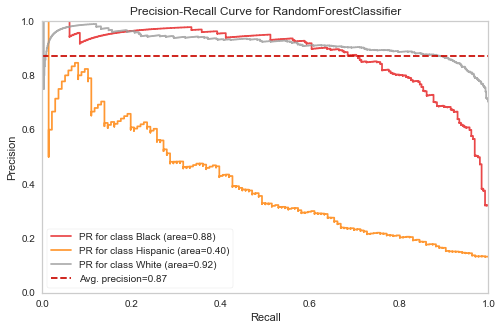

In [120]:
model = RandomForestClassifier(class_weight='balanced', n_estimators=128, max_depth=11, min_samples_split=40, 
                               ccp_alpha= 0.001, random_state=30)

viz = PrecisionRecallCurve(
        model,
        per_class=True, classes= ['Black', 'Hispanic', 'White'],
        cmap='Set1'
)

viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [121]:
viz.score_

{'Black': 0.8796741080698798,
 'Hispanic': 0.40341761551327704,
 'White': 0.9171660885079649,
 'micro': 0.8716287406625545}

In [122]:
y_pred = rf_grid_model.predict(X_test2)

rf_accuracy = accuracy_score(y_test2, y_pred)
rf_accuracy_balanced = balanced_accuracy_score(y_test2, y_pred)
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=['Hispanic'])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=['Hispanic'])
rf_AP = viz.score_['Hispanic']
rf_AP_micro = viz.score_['micro']

## 4. XGBoost

### Vanilla XGBoost Model

In [123]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights

array([1.4820167 , 0.50703142, 0.50703142, ..., 1.4820167 , 2.8330264 ,
       0.50703142])

In [124]:
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=30)

In [125]:
xgb_model.fit(X_train2, y_train2, sample_weight=classes_weights)
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[231   4  25]
 [ 12  70  54]
 [ 18  23 717]]
              precision    recall  f1-score   support

       Black       0.89      0.89      0.89       260
    Hispanic       0.72      0.51      0.60       136
       White       0.90      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.84      0.78      0.80      1154
weighted avg       0.88      0.88      0.88      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [126]:
y_pred = xgb_model.predict(X_test2)
print(f'accuracy_score\t\t: {accuracy_score(y_test2, y_pred)}')
print(f'balanced_accuracy_score : {balanced_accuracy_score(y_test2, y_pred)}') # recall_score(y_test2,y_pred2,average='macro')

accuracy_score		: 0.8821490467937608
balanced_accuracy_score : 0.7830259036839822


In [127]:
# CROSS VALIDATE

model = XGBClassifier(eval_metric='mlogloss', random_state=30)

scoring = {'accuracy': make_scorer(accuracy_score), 'accuracy_balanced': make_scorer(balanced_accuracy_score),
           'precision_Hispanic' : make_scorer(precision_score, average=None, labels=['Hispanic']),
           'recall_Hispanic' : make_scorer(recall_score, average=None, labels=['Hispanic']),
           'f1_Hispanic' : make_scorer(f1_score, average=None, labels=['Hispanic'])}

scores = cross_validate(model, X_train2, y_train2, scoring=scoring, cv=5, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_accuracy              0.875840
test_accuracy_balanced     0.755308
test_precision_Hispanic    0.697426
test_recall_Hispanic       0.436340
test_f1_Hispanic           0.535031
dtype: float64

### XGBoost Model GridsearchCV

In [128]:
# Grid Search
# this is the second try after seeing the values in the limit 

xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=30)

param_grid = {'n_estimators':[100, 128], 'max_depth':[3, 4, 6], 'learning_rate': [0.1, 0.3, 0.5],
              'min_child_weight':[1, 3], 'colsample_bytree':[0.5, 1], 'gamma': [0.01, 0.1]}

xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = 'recall_macro', verbose=2, n_jobs = -1)
xgb_grid.fit(X_train2, y_train2, sample_weight=classes_weights)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=30, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                    

In [129]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 128}

In [130]:
xgb_grid.best_score_

0.7882613636545001

In [131]:
eval_metric(xgb_grid, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[231  12  17]
 [ 14  82  40]
 [ 26  63 669]]
              precision    recall  f1-score   support

       Black       0.85      0.89      0.87       260
    Hispanic       0.52      0.60      0.56       136
       White       0.92      0.88      0.90       758

    accuracy                           0.85      1154
   macro avg       0.77      0.79      0.78      1154
weighted avg       0.86      0.85      0.85      1154


Train_Set
[[1019    5   14]
 [   3  532    8]
 [  33  144 2857]]
              precision    recall  f1-score   support

       Black       0.97      0.98      0.97      1038
    Hispanic       0.78      0.98      0.87       543
       White       0.99      0.94      0.97      3034

    accuracy                           0.96      4615
   macro avg       0.91      0.97      0.94      4615
weighted avg       0.96      0.96      0.96      4615



In [132]:
y_pred = xgb_grid.predict(X_test2)
print(f'accuracy_score\t\t: {accuracy_score(y_test2, y_pred)}')
print(f'balanced_accuracy_score : {balanced_accuracy_score(y_test2, y_pred)}') # recall_score(y_test2,y_pred2,average='macro')

accuracy_score		: 0.8509532062391681
balanced_accuracy_score : 0.7913294889703395


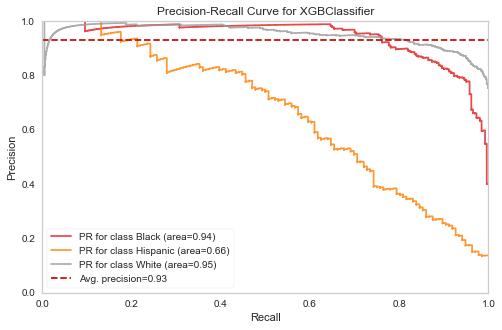

In [133]:
model = XGBClassifier(gamma=0.1, min_child_weight=3, max_depth=4, eval_metric='mlogloss',
                      n_estimators=128, colsample_bytree=0.5, learning_rate=0.1, random_state=30)

viz = PrecisionRecallCurve(
        model,
        per_class=True, classes= ['Black', 'Hispanic', 'White'],
        cmap='Set1',
        sample_weight=classes_weights
)

viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [134]:
viz.score_

{'Black': 0.9413897862762441,
 'Hispanic': 0.6632756863344947,
 'White': 0.9521451258505995,
 'micro': 0.9302507664836311}

In [135]:
y_pred = xgb_grid.predict(X_test2)

xgb_accuracy = accuracy_score(y_test2, y_pred)
xgb_accuracy_balanced = balanced_accuracy_score(y_test2, y_pred)
xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=['Hispanic'])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=['Hispanic'])
xgb_AP = viz.score_['Hispanic']
xgb_AP_micro = viz.score_['micro']

***

## Comparing Models

In [136]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                "Accuracy": [log_accuracy, svc_accuracy, rf_accuracy, xgb_accuracy],
                "Accuracy_Balanced": [log_accuracy_balanced, svc_accuracy_balanced, rf_accuracy_balanced, xgb_accuracy_balanced],
                "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
                "AP_Micro": [log_AP_micro, svc_AP_micro, rf_AP_micro, xgb_AP_micro]})

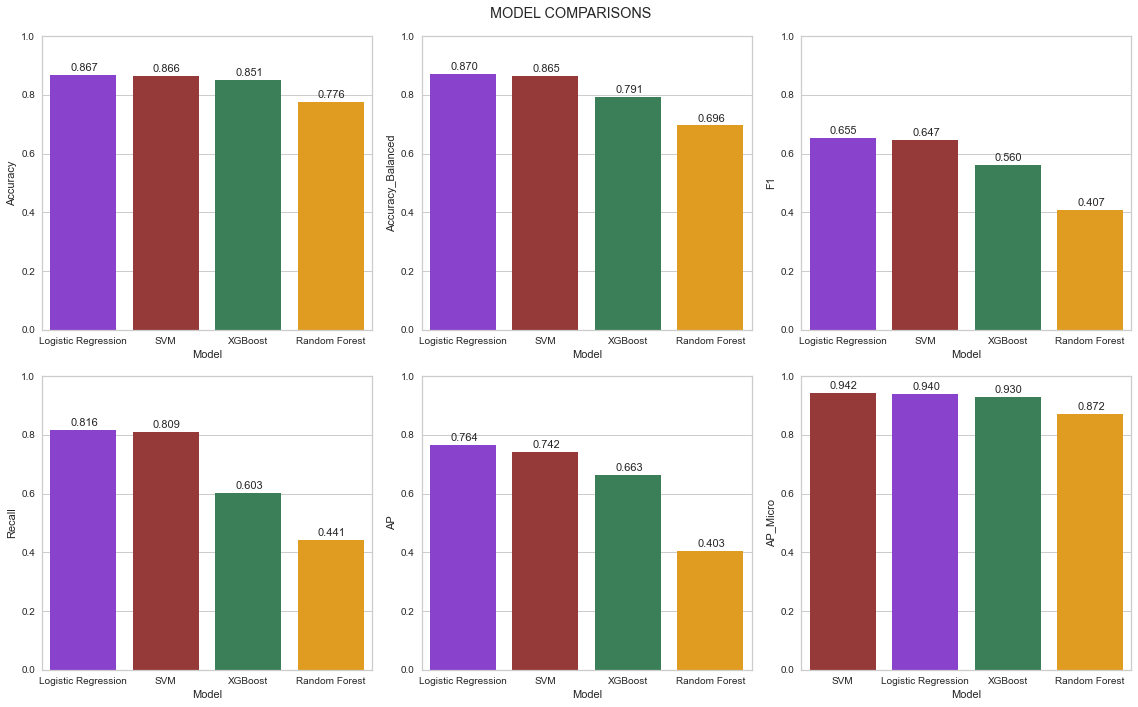

In [137]:
# recall, f1 and AP scores were calculated for the 'Hispanic' class

fig, ax = plt.subplots(2,3, figsize=(16,10))

def labels(ax, i, k):
    for p in ax[i][k].patches:
        ax[i][k].annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=11)
        ax[i][k].set_ylim(0, 1)
        
palette = {'Logistic Regression': 'blueviolet', 'SVM': 'brown', 'Random Forest': 'orange', 'XGBoost': 'seagreen'}
        
sns.barplot(x='Model', y='Accuracy', data=compare.sort_values('Accuracy', ascending=False), palette=palette, 
            ax = ax[0][0]), labels(ax,0,0)
sns.barplot(x='Model', y='Accuracy_Balanced', data=compare.sort_values('Accuracy_Balanced', ascending=False), 
            palette=palette, ax = ax[0][1]), labels(ax,0,1)
sns.barplot(x='Model', y='F1', data=compare.sort_values('F1', ascending=False), palette=palette, ax = ax[0][2]), labels(ax,0,2)
sns.barplot(x='Model', y='Recall', data=compare.sort_values('Recall', ascending=False), palette=palette, 
            ax = ax[1][0]), labels(ax,1,0)
sns.barplot(x='Model', y='AP', data=compare.sort_values('AP', ascending=False), palette=palette, ax = ax[1][1]), labels(ax,1,1)
sns.barplot(x='Model', y='AP_Micro', data=compare.sort_values('AP_Micro', ascending=False), palette=palette, 
            ax = ax[1][2]), labels(ax,1,2)

fig.suptitle('MODEL COMPARISONS')
fig.tight_layout();  

***Other Evaluation Metrics***

In [ ]:
# Overall performance scores for imbalanced datasets

In [138]:
from sklearn.metrics import matthews_corrcoef

y_pred = log_grid_model2.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7622944390084512

In [139]:
from sklearn.metrics import cohen_kappa_score

y_pred = log_grid_model2.predict(X_test)

cohen_kappa_score(y_test, y_pred)

0.7548430991391281

In [140]:
# imbalance accuracy metric

def IAM(c):
    '''
    c is a nested list presenting the confusion matrix of the classifier (len(c)>=2)
    '''
    l  = len(c)
    iam = 0

    for i in range(l):
        sum_row, sum_col = 0, 0      
        sum_row_no_i, sum_col_no_i = 0, 0
     
        for j in range(l):
            sum_row += c[i][j]
            sum_col += c[j][i]
            if j is not i:
                sum_row_no_i += c[i][j] 
                sum_col_no_i += c[j][i]
        iam += (c[i][i] - max(sum_row_no_i, sum_col_no_i))/max(sum_row, sum_col)
    return   iam/l

In [141]:
y_pred = log_grid_model2.predict(X_test)
c = confusion_matrix(y_test, y_pred)
print(f'IAM : {IAM(c)}')

IAM : 0.5257537355435636


---
---

---
---

# SMOTE

##  Smote implement

In [142]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [143]:
over = SMOTE(sampling_strategy={"Hispanic": 1050})
under = RandomUnderSampler(sampling_strategy={"White": 2600})

In [144]:
steps = [('o', over), ('u', under)]
pipeline = imbpipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [145]:
y_resampled.value_counts()

White       2600
Hispanic    1050
Black       1038
Name: Dodrace, dtype: int64

In [146]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: Dodrace, dtype: int64

## Logistic Regression Over/Under Sampling

In [147]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga',
                l1_ratio=0.1, C=5, penalty='elasticnet', random_state=30))]

smote_pipeline = imbpipeline(steps=operations)
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1050})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2600})),
                ('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(C=5, class_weight='balanced', l1_ratio=0.1,
                                    max_iter=1000, penalty='elasticnet',
                                    random_state=30, solver='saga'))])

In [148]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[244   4  12]
 [  8 102  26]
 [ 21  84 653]]
              precision    recall  f1-score   support

       Black       0.89      0.94      0.92       260
    Hispanic       0.54      0.75      0.63       136
       White       0.95      0.86      0.90       758

    accuracy                           0.87      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.87      0.87      1154


Train_Set
[[ 986   28   24]
 [  25  424   94]
 [  51  268 2715]]
              precision    recall  f1-score   support

       Black       0.93      0.95      0.94      1038
    Hispanic       0.59      0.78      0.67       543
       White       0.96      0.89      0.93      3034

    accuracy                           0.89      4615
   macro avg       0.83      0.88      0.85      4615
weighted avg       0.91      0.89      0.90      4615



In [149]:
model = smote_pipeline = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.865868
test_accuracy_balanced     0.831053
test_precision_Hispanic    0.523541
test_recall_Hispanic       0.696633
test_f1_Hispanic           0.596632
dtype: float64

In [ ]:
# I couldn't get better scores

## Xgboost Over/ Under Sampling

***I'll check the XGBoost scores with smote just to try***

In [150]:
over2 = SMOTE(sampling_strategy={"Hispanic": 1400})
under2 = RandomUnderSampler(sampling_strategy={"White": 2500})

In [151]:
steps2 = [('o', over2), ('u', under2)]
pipeline2 = imbpipeline(steps=steps2)
X_resampled2, y_resampled2 = pipeline2.fit_resample(X_train2, y_train2)

In [152]:
operations2 = [('o', over2), ('u', under2), ("scaler", MinMaxScaler()), 
               ("log", XGBClassifier(gamma=0.01, subsample=1, max_depth=4, eval_metric='mlogloss',
                      n_estimators=128, colsample_bytree=0.5, learning_rate=0.1, random_state=30))]

smote_pipeline2 = imbpipeline(steps=operations2)
smote_pipeline2.fit(X_train2, y_train2)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1400})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('log',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.5, enable_categorical=False,
                               eval_metric='mlogloss', gamma=0.01, gpu_id=-1,
                               importance_type=No...ction_constraints='',
                               learning_rate=0.1, max_delta_step=0, max_depth=4,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=128,
                               n_jobs=8, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=30, reg_alpha=

In [153]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[244   4  12]
 [  8 102  26]
 [ 21  84 653]]
              precision    recall  f1-score   support

       Black       0.89      0.94      0.92       260
    Hispanic       0.54      0.75      0.63       136
       White       0.95      0.86      0.90       758

    accuracy                           0.87      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.87      0.87      1154


Train_Set
[[ 986   28   24]
 [  25  424   94]
 [  51  268 2715]]
              precision    recall  f1-score   support

       Black       0.93      0.95      0.94      1038
    Hispanic       0.59      0.78      0.67       543
       White       0.96      0.89      0.93      3034

    accuracy                           0.89      4615
   macro avg       0.83      0.88      0.85      4615
weighted avg       0.91      0.89      0.90      4615



In [154]:
model2 = smote_pipeline2 = imbpipeline(steps=operations2)

scores = cross_validate(model2, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.855249
test_accuracy_balanced     0.746241
test_precision_Hispanic    0.544475
test_recall_Hispanic       0.479057
test_f1_Hispanic           0.508616
dtype: float64

***

#  SHAP

In [155]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [160]:
# Lasso regularization (l1) should be used as a penalty for feature selection
model_shap = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=30, penalty='l1', solver='saga')
model_shap.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=30, solver='saga')

In [161]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[243   6  11]
 [  5 109  22]
 [ 21  94 643]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.92       260
    Hispanic       0.52      0.80      0.63       136
       White       0.95      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 970   39   29]
 [  20  450   73]
 [  64  352 2618]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.54      0.83      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In [162]:
import shap
explainer = shap.Explainer(model_shap, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

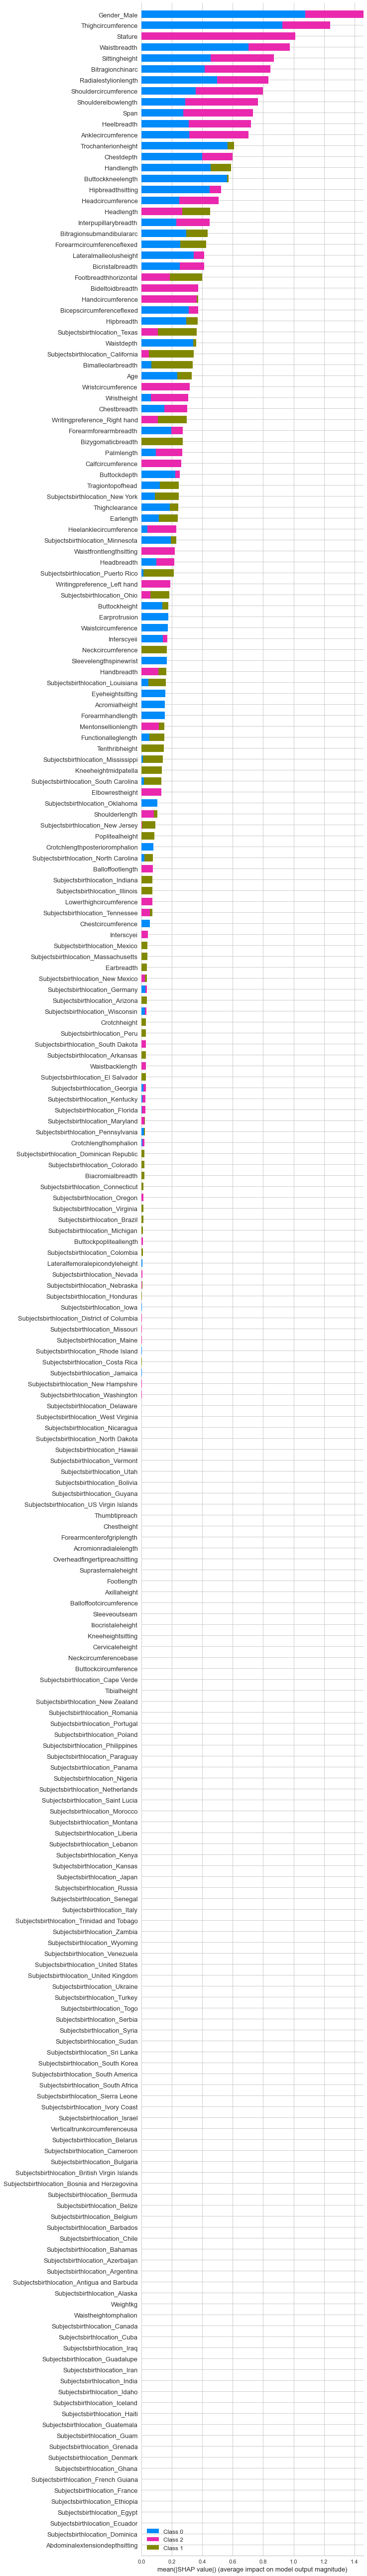

In [163]:
shap.summary_plot(shap_values, X_train_scaled, max_display=300, feature_names=X.columns)

In [ ]:
# list(X.columns)
# I will choose pure features that can help to separate labels better

In [176]:
hispanic = ['Subjectsbirthlocation','Stature','Buttockkneelength','Bideltoidbreadth','Handcircumference','Wristcircumference', 
    'Bizygomaticbreadth', 'Calfcircumference', 'Waistfrontlengthsitting', 'Trochanterionheight', 'Waistcircumference', 
    'Neckcircumference','Sleevelengthspinewrist','Eyeheightsitting','Acromialheight','Forearmhandlength','Waistdepth', 
    'Tenthribheight','Kneeheightmidpatella','Earprotrusion','Elbowrestheight','Poplitealheight','Balloffootlength',
    'Thighcircumference']

In [177]:
X3 = df[hispanic]
X3 = pd.get_dummies(data=X3, drop_first=True)
y = df.Dodrace

In [178]:
X3.shape

(5769, 158)

In [179]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=30, stratify =y)

In [180]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced', max_iter=1000, 
                                                                     random_state=30, penalty='l1', solver='saga'))]
pipe_shap_model = Pipeline(steps=operations)
pipe_shap_model.fit(X_train3, y_train3)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    penalty='l1', random_state=30,
                                    solver='saga'))])

In [181]:
eval_metric(pipe_shap_model, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[230   8  22]
 [  8 101  27]
 [ 56 119 583]]
              precision    recall  f1-score   support

       Black       0.78      0.88      0.83       260
    Hispanic       0.44      0.74      0.55       136
       White       0.92      0.77      0.84       758

    accuracy                           0.79      1154
   macro avg       0.72      0.80      0.74      1154
weighted avg       0.83      0.79      0.80      1154


Train_Set
[[ 914   56   68]
 [  26  435   82]
 [ 163  443 2428]]
              precision    recall  f1-score   support

       Black       0.83      0.88      0.85      1038
    Hispanic       0.47      0.80      0.59       543
       White       0.94      0.80      0.87      3034

    accuracy                           0.82      4615
   macro avg       0.75      0.83      0.77      4615
weighted avg       0.86      0.82      0.83      4615



In [ ]:
# scores got worse

In [182]:
# Cross Validate

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.804983
test_accuracy_balanced     0.801462
test_precision_Hispanic    0.445215
test_recall_Hispanic       0.742323
test_f1_Hispanic           0.555995
dtype: float64

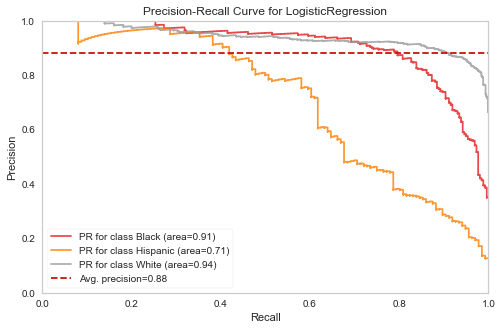

In [183]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train3, y_train3)
viz.score(X_test3, y_test3)
viz.show();

## SMOTE for X3 dataset

In [184]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga',
                l1_ratio=0.1, C=5, penalty='elasticnet', random_state=30))]

smote_pipeline2 = imbpipeline(steps=operations)
smote_pipeline2.fit(X_train3, y_train3)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1050})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2600})),
                ('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(C=5, class_weight='balanced', l1_ratio=0.1,
                                    max_iter=1000, penalty='elasticnet',
                                    random_state=30, solver='saga'))])

In [185]:
eval_metric(smote_pipeline2, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[221  16  23]
 [ 10  90  36]
 [ 61  90 607]]
              precision    recall  f1-score   support

       Black       0.76      0.85      0.80       260
    Hispanic       0.46      0.66      0.54       136
       White       0.91      0.80      0.85       758

    accuracy                           0.80      1154
   macro avg       0.71      0.77      0.73      1154
weighted avg       0.82      0.80      0.80      1154


Train_Set
[[ 925   50   63]
 [  48  380  115]
 [ 170  333 2531]]
              precision    recall  f1-score   support

       Black       0.81      0.89      0.85      1038
    Hispanic       0.50      0.70      0.58       543
       White       0.93      0.83      0.88      3034

    accuracy                           0.83      4615
   macro avg       0.75      0.81      0.77      4615
weighted avg       0.85      0.83      0.84      4615



In [186]:
# Cross Validate

model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring=scoring, cv=10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.818201
test_accuracy_balanced     0.789433
test_precision_Hispanic    0.483098
test_recall_Hispanic       0.672323
test_f1_Hispanic           0.560117
dtype: float64

***

# Find the best threshold for multiclassification

In [ ]:
# Since the worst scores belong to the 'hispanic' class, I will adjust it that way

In [187]:
y2 = y.map({"Hispanic":1, "White":0, "Black":0})

In [188]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X3, y2, test_size=0.2, random_state=30, stratify =y2)

In [189]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga',
                                            l1_ratio=0.1, C=5, penalty='elasticnet', random_state=30))]

pipe_shap_model2 = Pipeline(steps=operations)
pipe_shap_model2.fit(X_train4, y_train4)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(C=5, class_weight='balanced', l1_ratio=0.1,
                                    max_iter=1000, penalty='elasticnet',
                                    random_state=30, solver='saga'))])

In [190]:
eval_metric(pipe_shap_model2, X_train4, y_train4, X_test4, y_test4)

Test_Set
[[839 179]
 [ 27 109]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1018
           1       0.38      0.80      0.51       136

    accuracy                           0.82      1154
   macro avg       0.67      0.81      0.70      1154
weighted avg       0.90      0.82      0.85      1154


Train_Set
[[3347  725]
 [  97  446]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      4072
           1       0.38      0.82      0.52       543

    accuracy                           0.82      4615
   macro avg       0.68      0.82      0.71      4615
weighted avg       0.90      0.82      0.85      4615



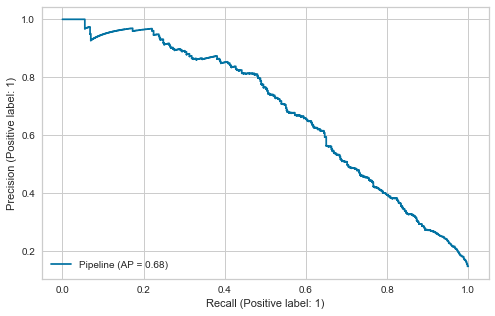

In [191]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(max_iter=10000, random_state=30))]
log_basic_model = Pipeline(steps=operations)

log_basic_model.fit(X_train4, y_train4)
plot_precision_recall_curve(log_basic_model, X_train4, y_train4);

In [192]:
y_pred_proba = log_basic_model.predict_proba(X_train4)
average_precision_score(y_train4, y_pred_proba[:,1])

0.6846256925958736

In [193]:
precisions, recalls, thresholds = precision_recall_curve(y_train4, y_pred_proba[:,1])

In [194]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.2987902741160623

In [195]:
y_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_test4)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [196]:
print(confusion_matrix(y_test4,y_pred2))
print(classification_report(y_test4,y_pred2))

[[672 346]
 [ 19 117]]
              precision    recall  f1-score   support

           0       0.97      0.66      0.79      1018
           1       0.25      0.86      0.39       136

    accuracy                           0.68      1154
   macro avg       0.61      0.76      0.59      1154
weighted avg       0.89      0.68      0.74      1154



In [197]:
y_train_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_train4)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train4, y_train_pred2))
print(classification_report(y_train4, y_train_pred2))

[[2787 1285]
 [  36  507]]
              precision    recall  f1-score   support

           0       0.99      0.68      0.81      4072
           1       0.28      0.93      0.43       543

    accuracy                           0.71      4615
   macro avg       0.64      0.81      0.62      4615
weighted avg       0.90      0.71      0.76      4615



In [198]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [199]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga',
                                            l1_ratio=0.1, C=5, penalty='elasticnet', random_state=30))]
model = Pipeline(steps=operations)
CV(10, model, X_train4, y_train4, optimal_threshold)

Accuracy      69.92%  std 2.11%
Precision-1   26.61%  std 1.65%
Recall-1      88.02%  std 3.04%
F1_score-1    40.84%  std 2.15%


# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [200]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga',
                                            l1_ratio=0.1, C=5, penalty='elasticnet', random_state=30))]
final_model = Pipeline(steps=operations)

In [201]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(C=5, class_weight='balanced', l1_ratio=0.1,
                                    max_iter=1000, penalty='elasticnet',
                                    random_state=30, solver='saga'))])

In [202]:
import pickle
pickle.dump(final_model, open('final_model_soldiers', 'wb'))

In [203]:
X.describe()

,Abdominalextensiondepthsitting,Acromialheight,Acromionradialelength,Anklecircumference,Axillaheight,Balloffootcircumference,Balloffootlength,Biacromialbreadth,Bicepscircumferenceflexed,Bicristalbreadth,Bideltoidbreadth,Bimalleolarbreadth,Bitragionchinarc,Bitragionsubmandibulararc,Bizygomaticbreadth,Buttockcircumference,Buttockdepth,Buttockheight,Buttockkneelength,Buttockpopliteallength,Calfcircumference,Cervicaleheight,Chestbreadth,Chestcircumference,Chestdepth,Chestheight,Crotchheight,Crotchlengthomphalion,Crotchlengthposterioromphalion,Earbreadth,Earlength,Earprotrusion,Elbowrestheight,Eyeheightsitting,Footbreadthhorizontal,Footlength,Forearmcenterofgriplength,Forearmcircumferenceflexed,Forearmforearmbreadth,Forearmhandlength,Functionalleglength,Handbreadth,Handcircumference,Handlength,Headbreadth,Headcircumference,Headlength,Heelanklecircumference,Heelbreadth,Hipbreadth,Hipbreadthsitting,Iliocristaleheight,Interpupillarybreadth,Interscyei,Interscyeii,Kneeheightmidpatella,Kneeheightsitting,Lateralfemoralepicondyleheight,Lateralmalleolusheight,Lowerthighcircumference,Mentonsellionlength,Neckcircumference,Neckcircumferencebase,Overheadfingertipreachsitting,Palmlength,Poplitealheight,Radialestylionlength,Shouldercircumference,Shoulderelbowlength,Shoulderlength,Sittingheight,Sleevelengthspinewrist,Sleeveoutseam,Span,Stature,Suprasternaleheight,Tenthribheight,Thighcircumference,Thighclearance,Thumbtipreach,Tibialheight,Tragiontopofhead,Trochanterionheight,Verticaltrunkcircumferenceusa,Waistbacklength,Waistbreadth,Waistcircumference,Waistdepth,Waistfrontlengthsitting,Waistheightomphalion,Weightkg,Wristcircumference,Wristheight,Age,Gender_Male,Subjectsbirthlocation_Alaska,Subjectsbirthlocation_Antigua and Barbuda,Subjectsbirthlocation_Argentina,Subjectsbirthlocation_Arizona,Subjectsbirthlocation_Arkansas,Subjectsbirthlocation_Azerbaijan,Subjectsbirthlocation_Bahamas,Subjectsbirthlocation_Barbados,Subjectsbirthlocation_Belarus,Subjectsbirthlocation_Belgium,Subjectsbirthlocation_Belize,Subjectsbirthlocation_Bermuda,Subjectsbirthlocation_Bolivia,Subjectsbirthlocation_Bosnia and Herzegovina,Subjectsbirthlocation_Brazil,Subjectsbirthlocation_British Virgin Islands,Subjectsbirthlocation_Bulgaria,Subjectsbirthlocation_California,Subjectsbirthlocation_Cameroon,Subjectsbirthlocation_Canada,Subjectsbirthlocation_Cape Verde,Subjectsbirthlocation_Chile,Subjectsbirthlocation_Colombia,Subjectsbirthlocation_Colorado,Subjectsbirthlocation_Connecticut,Subjectsbirthlocation_Costa Rica,Subjectsbirthlocation_Cuba,Subjectsbirthlocation_Delaware,Subjectsbirthlocation_Denmark,Subjectsbirthlocation_District of Columbia,Subjectsbirthlocation_Dominica,Subjectsbirthlocation_Dominican Republic,Subjectsbirthlocation_Ecuador,Subjectsbirthlocation_Egypt,Subjectsbirthlocation_El Salvador,Subjectsbirthlocation_Ethiopia,Subjectsbirthlocation_Florida,Subjectsbirthlocation_France,Subjectsbirthlocation_French Guiana,Subjectsbirthlocation_Georgia,Subjectsbirthlocation_Germany,Subjectsbirthlocation_Ghana,Subjectsbirthlocation_Grenada,Subjectsbirthlocation_Guadalupe,Subjectsbirthlocation_Guam,Subjectsbirthlocation_Guatemala,Subjectsbirthlocation_Guyana,Subjectsbirthlocation_Haiti,Subjectsbirthlocation_Hawaii,Subjectsbirthlocation_Honduras,Subjectsbirthlocation_Iceland,Subjectsbirthlocation_Idaho,Subjectsbirthlocation_Illinois,Subjectsbirthlocation_India,Subjectsbirthlocation_Indiana,Subjectsbirthlocation_Iowa,Subjectsbirthlocation_Iran,Subjectsbirthlocation_Iraq,Subjectsbirthlocation_Israel,Subjectsbirthlocation_Italy,Subjectsbirthlocation_Ivory Coast,Subjectsbirthlocation_Jamaica,Subjectsbirthlocation_Japan,Subjectsbirthlocation_Kansas,Subjectsbirthlocation_Kentucky,Subjectsbirthlocation_Kenya,Subjectsbirthlocation_Lebanon,Subjectsbirthlocation_Liberia,Subjectsbirthlocation_Louisiana,Subjectsbirthlocation_Maine,Subjectsbirthlocation_Maryland,Subjectsbirthlocation_Massachusetts,Subjectsbirthlocation_Mexico,Subjectsbirthlocation_Michigan,Subjectsbirthlocation_Minnesota,S

In [204]:
mean_human = X.describe().loc['mean']
mean_human

Abdominalextensiondepthsitting                   247.254290
Acromialheight                                  1408.630265
Acromionradialelength                            328.071590
Anklecircumference                               225.201768
Axillaheight                                    1301.902583
Balloffootcircumference                          244.408043
Balloffootlength                                 195.118911
Biacromialbreadth                                399.706015
Bicepscircumferenceflexed                        341.663027
Bicristalbreadth                                 274.903449
Bideltoidbreadth                                 491.454845
Bimalleolarbreadth                                72.335413
Bitragionchinarc                                 324.962212
Bitragionsubmandibulararc                        306.677760
Bizygomaticbreadth                               139.529381
Buttockcircumference                            1022.059456
Buttockdepth                            

In [205]:
final_model = pickle.load(open('final_model_soldiers', 'rb'))

In [206]:
final_model.predict([mean_human])

array(['White'], dtype=object)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___